## K-means Clustering and Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
from scipy.io import loadmat # used to implement mat file type
import random as rd
import ex7_func as fn
from sklearn import svm
from scipy import misc # used to convert image to a 3d matrix
# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## 1 K-means Clustering

In this this exercise, the K-means algorithm is implemented to and used for image compression.  It will start on an example 2D dataset that will help to gain an intuition of how the K-means algorithm works. After that, the K-means algorithm is used for image compression by reducing the number of colors that occur in an image to only those that are  most common in that image.

## Loading and Visualizing Data

In [2]:
!ls

bird_small.mat	ex7faces.mat
bird_small.png	ex7_func.py
ex7data1.mat	ex7_func.pyc
ex7data2.mat	K-means Clustering and Principal Component Analysis.ipynb


In [3]:
# Loading Data
directory = os.getcwd() + '/ex7data2.mat'
raw_data = loadmat(directory)
print raw_data.keys()

X = np.array(raw_data['X'])
X.shape

['X', '__version__', '__header__', '__globals__']


(300, 2)

## Find Closest Centroids

In [4]:
# Select an initial set of centroids
K = 3; # 3 Centroids
initial_centroids = np.array([[3,3], [6,2], [8,5]])
initial_centroids.shape

(3, 2)

In [5]:
reload(fn)

idx = fn.findClosestCentroids(X, initial_centroids)

print 'Closest centroids for the first 3 examples:{}'.format(idx[:3]+1)
print '\n(the closest centroids should be 1, 3, 2 respectively)'

Closest centroids for the first 3 examples:[ 1.  3.  2.]

(the closest centroids should be 1, 3, 2 respectively)


## Compute Means

In [6]:
reload(fn)
centroids = fn.computeCentroids(X, idx, K)

print 'Centroids computed after initial finding of closest centroids:\n{}'.format(centroids)
print '\n(the centroids should be\n'
print '   [ 2.428301 3.157924 ]'
print '   [ 5.813503 2.633656 ]'
print '   [ 7.119387 3.616684 ]\n'


Centroids computed after initial finding of closest centroids:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



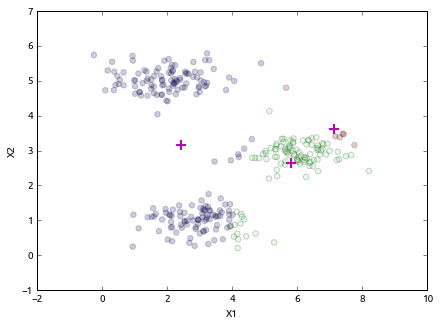

In [7]:
reload(fn)
# plot the data points and initial places of centroids
fn.plotkMeans(X, idx, centroids)

## K-Means Clustering

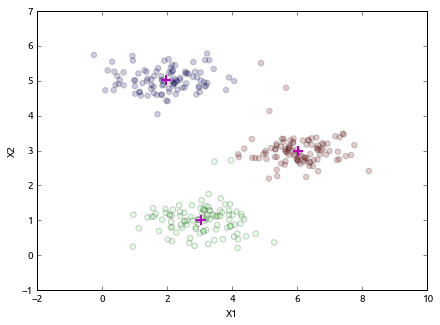

In [8]:
reload(fn)

# Settings for running K-Means
K = 3;
max_iters = 10;

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids,idx = fn.runkMeans(X, initial_centroids, max_iters)
fn.plotkMeans(X, idx, centroids)

## Random initialization

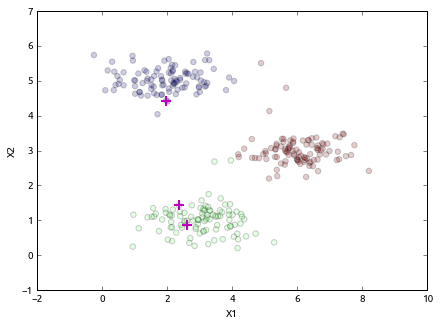

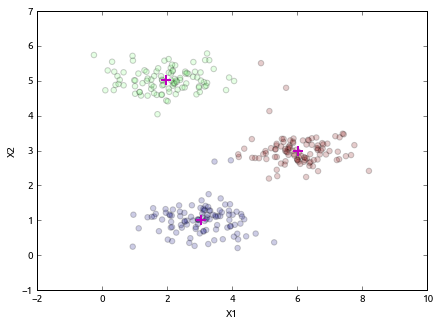

In [9]:
reload(fn)
# When using K-Means, it is important the initialize the centroids randomly. 
initial_centroids = fn.kMeansInitCentroids(X, K)
fn.plotkMeans(X, idx, initial_centroids)
# see if the kmeans stuck at local optima
centroids,idx = fn.runkMeans(X, initial_centroids, max_iters)
fn.plotkMeans(X, idx, centroids)

## K-Means Clustering on Pixels

The next task is to apply K-means to image compression. Clustering can be used to find a small number of colors that are most representative of the image, and map the original 24-bit (each pixel is repre sented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. ) colors to a lower-dimensional color space using the cluster assignments.This encoding is often refered to as the RGB encoding.  Our image contains thousands of colors, and in this part of the exercise, the number of colors will be reduced to 16 colors. Here's the image we're going to compress.

![title](bird_small.png)

In [10]:
# Loading Data
directory = os.getcwd() + '/bird_small.png'
A = misc.imread(directory) # 640x480x3 array
print A.shape, np.max(A)

(128, 128, 3) 255


In [11]:
# Divide by 255 so that all values are in the range 0 - 1
A = A / 255.

# Size of the image
size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
total_pixels = size[0]*size[1]
X = A.reshape(total_pixels,size[2])
X.shape

(16384, 3)

In [12]:
reload(fn)

# initialize some parameters
# can play witk K to see different results
K = 10
max_iters = 10

initial_centroids = fn.kMeansInitCentroids(X, K)

centroids, idx1 = fn.runkMeans(X, initial_centroids, max_iters)

## Image Compression

In [13]:
reload(fn)
# In this part of the exercise, the clusters of K-Means is used to
# compress an image. To do this, we first find the closest clusters for 
# each example.

# Find closest cluster members
idx = fn.findClosestCentroids(X, centroids)

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by it's index in idx) to the centroid value
X_recovered = centroids[idx.astype(int),:]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(size[0],size[1],size[2])
X_recovered.shape

(128, 128, 3)

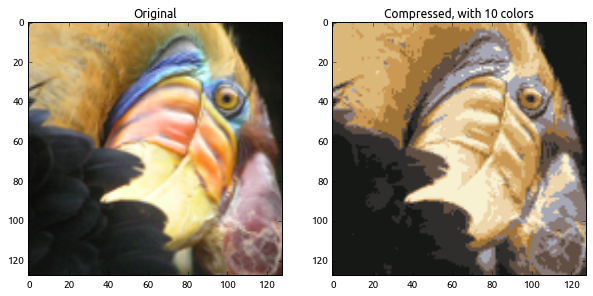

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(A)
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed, with {} colors'.format(K))